# Comparison of the accuracy of a cutting plane active learning procedure using the (i) analytic center; (ii) Chebyshev center; and (iii) random center on the Iris flower data set

# The set up

In [16]:
import numpy as np
import active
import experiment
from sklearn import datasets # The Iris dataset is imported from here.
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 1
%aimport active
%aimport experiment

np.set_printoptions(precision=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 18

# Importing and processing the Iris data set

In this experiment we work with the classic Iris flower data set. The Iris flower data set consists of 3 classes of 50 instances where each class corresponds to a different species of the Iris flower. For each instance there are 4 features. 

This data set is useful as it is known that one of the classes is linearly seperable from the other 2. (In the other experiment the data set used, the Pima Indians diabetes data set, is not linearly seperable.)

For simplicity, we work with the first two features of the data set, sepal length in cm and sepal width in cm, and label the class of Iris Setosa flowers 1 and the other two classes, Iris Versicolour and Iris Virginica, -1.

We will randomly divide the data set into two halves, to be used for training and testing.

In [18]:
# This code was adapted from 
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#

iris = datasets.load_iris()
X = iris.data[:, :2]  # Take the first two features.
Y = iris.target

In [19]:
print('X has shape', X.shape)
print('Y has shape', Y.shape)

X has shape (150, 2)
Y has shape (150,)


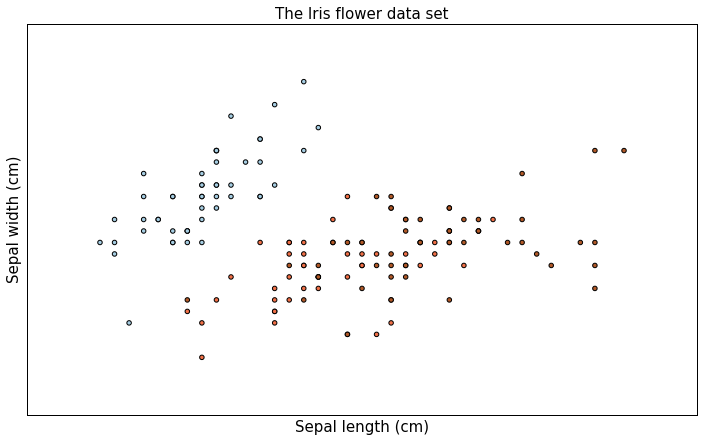

In [20]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(12, 7))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('The Iris flower data set')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.savefig('iris.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

In [21]:
bias = np.ones((X.shape[0], 1)) # Add a bias variable set to 1.
X = np.hstack((X, bias))

Y[Y==1] = -1
Y[Y==2] = -1
Y[Y==0] = +1

np.random.seed(1)
size = X.shape[0]
index = np.arange(size)
np.random.shuffle(index)
training_index = index[:int(size/2)]
testing_index = index[int(size/2):]

X_iris_training = X[training_index]
Y_iris_training = Y[training_index]
X_iris_testing = X[training_index]
Y_iris_testing = Y[training_index]

# The experiment

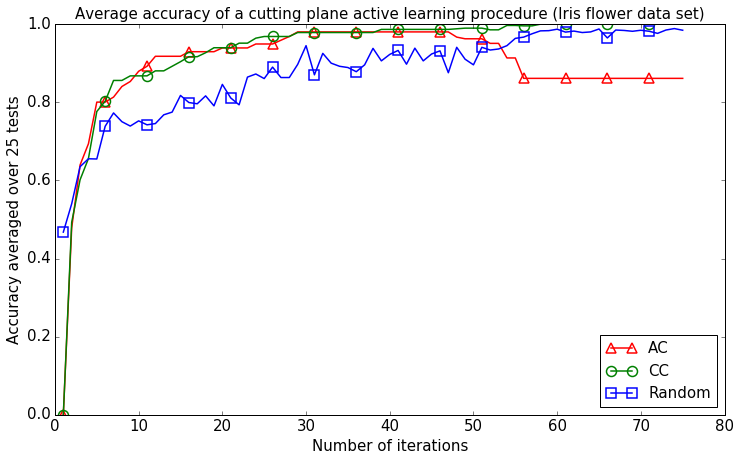

In [22]:
n = 25
iterations = 75
X_testing = X_iris_testing
Y_testing = Y_iris_testing
X_training = X_iris_training
Y_training = Y_iris_training

configs = [('ac', 'r^-', 'AC'), ('cc', 'go-', 'CC'), ('random', 'bs-', 'Random')]
queries = np.arange(1, iterations + 1)

plt.figure(figsize=(12,7))

for config in configs:
    average_accuracies = \
    experiment.experiment(n, iterations, X_testing, Y_testing, 
                          X_training, Y_training, center=config[0], 
                          sample = 1, M=None)
    plt.plot(queries, average_accuracies, config[1], label=config[2], 
             markevery=5,
             lw=1.5, ms=10, markerfacecolor='none', markeredgewidth=1.5,
             markeredgecolor = config[1][0])

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy averaged over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning procedure (Iris flower data set)')
plt.legend(loc='best')

plt.savefig('iris_experiment.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

# References:
[1] http://archive.ics.uci.edu/ml/datasets/Iris
[2] https://en.wikipedia.org/wiki/Iris_flower_data_set
[3] http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#
[4] https://arxiv.org/pdf/1508.02986.pdf